 # Cvičení 11. Vícevýběrové testy
 ## Michal Béreš, Martina Litschmannová, Adéla Vrtková

## Testovací data pro ukázku volání funkcí

In [1]:
# vyrobím data framy o jednom sloupci z náh. dat
a <- as.data.frame(rnorm(n = 35, mean = 117, sd = 10))
b <- as.data.frame(rnorm(n = 30, mean = 105, sd = 10))
c <- as.data.frame(rnorm(n = 40, mean = 102, sd = 10))
d <- as.data.frame(rnorm(n = 32, mean = 101, sd = 10))

# přejmenuju název sloupce
colnames(a) <- c("hodnota")
colnames(b) <- c("hodnota")
colnames(c) <- c("hodnota")
colnames(d) <- c("hodnota")

# doplním typ pro všechny data framy
a$typ <- "a"
b$typ <- "b"
c$typ <- "c"
d$typ <- "d"

# slepím po řádcích dohromady
data <- rbind(a, b, c, d)
# převedu typ na typ factor
data$typ <- as.factor(data$typ)

head(data)


,hodnota,typ
,<dbl>,<fct>
1,114.0966,a
2,112.0691,a
3,112.9446,a
4,107.8346,a
5,111.2253,a
6,123.8451,a


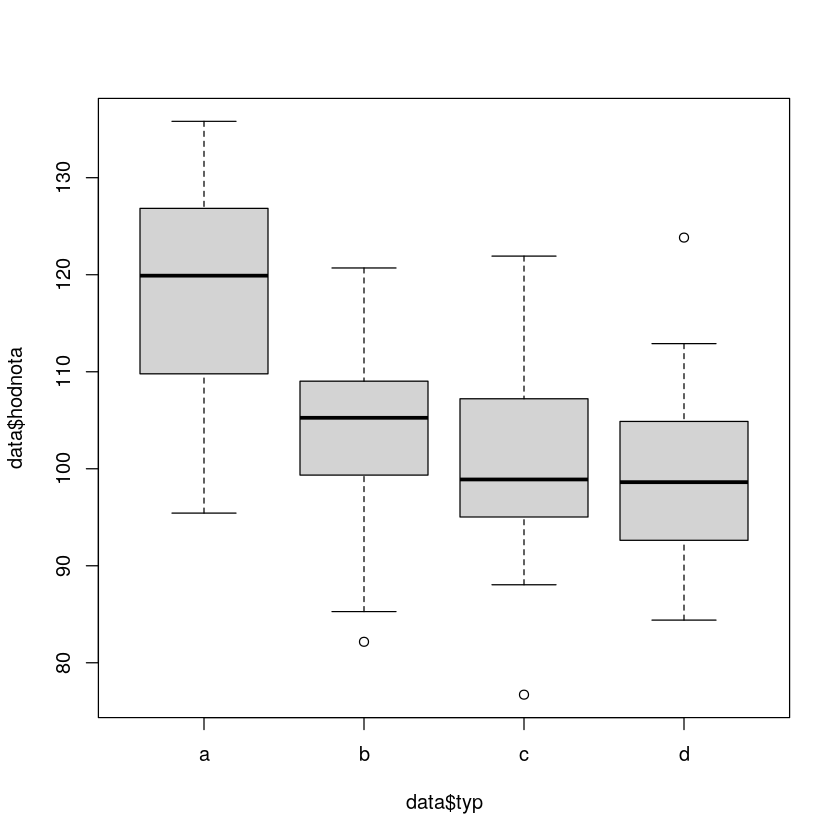

In [2]:
boxplot(data$hodnota ~ data$typ)
# pokud jsou k dispozici nějaká OP, budu je igrorovat
# (vím, že data jsou z normálního rozdělení!)
# (vím i že mají stejný rozptyl)


# Přehled funkcí 
## Míry variability
### Bartlettův test
- ověřuje shodu rozptylů
    - $H_0: \sigma^2_1 = \sigma^2_2 = \sigma^2_3 = \ldots$
    - $H_A: \neg H_0$
- předpokladem je normalita dat (a samozřejmě nezávislost a spojitost)

In [3]:
bartlett.test(data$hodnota ~ data$typ)



	Bartlett test of homogeneity of variances

data:  data$hodnota by data$typ
Bartlett's K-squared = 2.2629, df = 3, p-value = 0.5197


### Leveneův test
- ověřuje shodu rozptylů
    - $H_0: \sigma^2_1 = \sigma^2_2 = \sigma^2_3 = \ldots$
    - $H_A: \neg H_0$
- předpokladem je pouze nezávislost a spojitost

In [4]:
car::leveneTest(data$hodnota ~ data$typ)


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,1.852917,0.1406825
,133,NA,NA


### Cochranův a Hartleyův test
- také ověřují shodu rozptylů
- požadují normalitu dat a tzv. vyvážené třízení
    - vyvážené třízení znamená, že máme přibližně stejné množství dat v každé skupině
- nebudeme je používat

## Míry polohy
### ANOVA (analýza rozptylu)
- ověřuje shodu polohy (středních hodnot)
    - $H_0: \mu_1 = \mu_2 = \mu_3 = \ldots$
    - $H_A: \neg H_0$
- předpoklady:
    - normalita dat
    - homoskedasticita (shodné rozptyly)
    - (a samozřejmě nezávislost a spojitost)
- pokud zamítáme $H_0$ je vyžadována Post-Hoc analýza
    - pomocí TukeyHSD testu

In [5]:
# Základní ANOVA
# H0: mu1 = mu2 = mu3 = mu4
# HA: ~H0 (negace H0)

res <- aov(data$hodnota ~ data$typ)
summary(res)


             Df Sum Sq Mean Sq F value   Pr(>F)    
data$typ      3   8053  2684.4   30.38 5.05e-15 ***
Residuals   133  11754    88.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [6]:
# Post-Hoc analýza

TukeyHSD(res)


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data$hodnota ~ data$typ)

$`data$typ`
          diff        lwr        upr     p adj
b-a -14.538829 -20.624329  -8.453329 0.0000000
c-a -17.501414 -23.162515 -11.840314 0.0000000
d-a -19.280643 -25.262867 -13.298419 0.0000000
c-b  -2.962585  -8.869935   2.944764 0.5614954
d-b  -4.741814 -10.957577   1.473950 0.1988974
d-c  -1.779228  -7.580130   4.021673 0.8552174


In [7]:
# počítání efektů
library(dplyr)

# celkový průměr
prumer_vsech <- mean(data$hodnota)
prumer_vsech

# průměry ve skupinách
efekty <- data %>%
    group_by(typ) %>%
    summarize(mean_skup = mean(hodnota))

# efekty
efekty$efekt <- efekty$mean_skup - prumer_vsech

# vypsat setřízené
efekty %>% arrange(desc(efekt))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 105.5178

typ,mean_skup,efekt
<fct>,<dbl>,<dbl>
a,118.31485,12.797095
b,103.77602,-1.741734
c,100.81343,-4.704319
d,99.03421,-6.483548


### Kruskalův - Wallisův test
- ověřuje shodu polohy (mediánů)
    - $H_0: X_{0.5,1} = X_{0.5,2} = X_{0.5,3} = \ldots$
    - $H_A: \neg H_0$
- předpoklady:
    - symetrie dat
    - (a samozřejmě nezávislost a spojitost)
- pokud zamítáme $H_0$ je vyžadována Post-Hoc analýza
    - pomocí Dunnové testu/metody

In [8]:
# Základní KW test
# H0: X0.5,1 = X0.5,2 = X0.5,3 = X0.5,4
# HA: ~H0 (negace H0)

kruskal.test(data$hodnota ~ data$typ)



	Kruskal-Wallis rank sum test

data:  data$hodnota by data$typ
Kruskal-Wallis chi-squared = 51.107, df = 3, p-value = 4.642e-11


In [9]:
# Post-Hoc analýza

# altP = T nastavuje p-hodnotu tak,aby se při rozhodování
# o statistické významnosti srovnávala s alfa
# (defaultně: altp = FALSE, pak srovnáváme s alfa/2)

# install.packages("dunn.test")

dunn.test::dunn.test(
    x = data$hodnota, g = data$typ,
    method = "bonferroni", altp = TRUE
)


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 51.107, df = 3, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          a          b          c
---------+---------------------------------
       b |   4.232578
         |    0.0001*
         |
       c |   5.894169   1.288247
         |    0.0000*     1.0000
         |
       d |   6.454611   2.068220   0.904246
         |    0.0000*     0.2317     1.0000

alpha = 0.05
Reject Ho if p <= alpha


In [10]:
# počítání efektů

# celkový median
median_vsech <- median(data$hodnota)
median_vsech

# mediany ve skupinách
efekty <- data %>%
    group_by(typ) %>%
    summarize(median_skup = median(hodnota))

# efekty
efekty$efekt <- efekty$median_skup - median_vsech

# vypsat setřízené
efekty %>% arrange(desc(efekt))


[1] 105.3172

typ,median_skup,efekt
<fct>,<dbl>,<dbl>
a,119.90213,14.58497321
b,105.25164,-0.06551219
c,98.89353,-6.42361926
d,98.61793,-6.69922074


# Příklady
## Příklad 1.
Testujeme nulovou hypotézu µ1 = µ2 = µ3. Bylo zjištěno, že data, která máme k dispozici jsou výběry z normálního rozdělení splňující předpoklad homoskedasticity (shody rozptylů). Na základě údajů získaných explorační analýzou doplňte tabulku ANOVA a vyplývající závěry.<br>
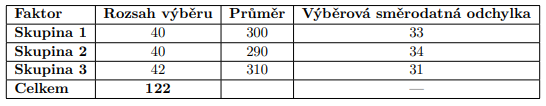

In [11]:
n <- c(40, 40, 42) # rozsahy výběrů
prum <- c(300, 290, 310) # průměry v jednotlivých skupinách / třídách
s <- c(33, 34, 31) # směr. odchylky v jednotlivých skup. / třídách


In [12]:
n.total <- sum(n) # celkový rozsah výběrů
k <- 3 # počet tříd
df.b <- k - 1 # počet stupňů volnosti - meziskupinový
df.e <- n.total - k # počet stupňů volnosti - reziduální


In [13]:
# celkový průměr (pomocí váženého průměru)
prum.total <- weighted.mean(x = prum, w = n)
prum.total


[1] 300.1639

In [14]:
# meziskupinový součet čtverců
ss.b <- sum(n * (prum - prum.total)^2)
ss.b


[1] 8196.721

In [15]:
# reziduální součet čtverců
ss.e <- sum((n - 1) * s^2)
ss.e


[1] 126956

In [16]:
# celkový součet čtverců
ss.b + ss.e


[1] 135152.7

In [17]:
# rozptyl mezi skupinami / třídami
ms.b <- ss.b / df.b
ms.b


[1] 4098.361

In [18]:
# rozptyl uvnitř skupin / tříd
ms.e <- ss.e / df.e
ms.e


[1] 1066.857

In [19]:
# F-poměr
F_ratio <- ms.b / ms.e
F_ratio


[1] 3.841527

In [20]:
# p-hodnota
p <- 1 - pf(F_ratio, df.b, df.e)
p

# Na hladině významnosti 0,05 zamítáme hypotézu o shodě středních hodnot
# tj. střední hodnoty alespoň jedné dvojice skupin se stat. významně liší.


[1] 0.02417085

In [21]:
# odhady skupinových efektů
efekt <- prum - prum.total
efekt

# Oproti celkovému průměru vykazuje nejvíce podprůměrné výsledky skupina 2
# (o cca 10 jednotek nižší než celkový průměr). Naopak průměr skupiny 3 je
# o cca 10 jednotek vyšší než celkový průměr. Průměrné výsledky skupiny 1
# odpovídají celkovému průměru.


[1]  -0.1639344 -10.1639344   9.8360656

## Příklad 2.
122 pacientů, kteří podstoupili operaci srdce, bylo náhodně rozděleno do tří skupin.<br>
**Skupina 1:** Pacienti dostali 50 % oxidu dusného a 50 % kyslíkové směsi nepřetržitě po dobu 24 hodin.<br>
**Skupina 2:** Pacienti dostali 50 % oxidu dusného a 50 % kyslíkové směsi pouze během operace.<br>
**Skupina 3:** Pacienti nedostali žádný oxid dusný, ale dostali 35-50 % kyslíku po dobu 24 hodin.<br>
Data v souboru kyselina listova.xls odpovídají koncentracím soli kyseliny listové v červených krvinkách ve všech třech skupinách po uplynutí 24 hodin ventilace. Ověřte, zda pozorované rozdíly mezi koncentracemi soli kyseliny listové jsou statisticky významné, tj. zda existuje vliv složení směsi na sledovaný parametr.

In [22]:
kysel <- readxl::read_excel("data/testy_vicevyberove.xlsx", sheet = 1)
colnames(kysel) <- c("sk1", "sk2", "sk3") # přejmenování sloupců
kysel


sk1,sk2,sk3
<dbl>,<dbl>,<dbl>
234,267,351
306,301,284
261,253,291
255,278,270
267,216,205
304,188,318
301,264,282
264,235,238
307,211,309


In [23]:
# převod do standardního datového formátu
kysel.s <- stack(kysel)
colnames(kysel.s) <- c("hodnoty", "skupina")
kysel.s <- na.omit(kysel.s)
head(kysel.s)


,hodnoty,skupina
,<dbl>,<fct>
1,234,sk1
2,306,sk1
3,261,sk1
4,255,sk1
5,267,sk1
6,304,sk1


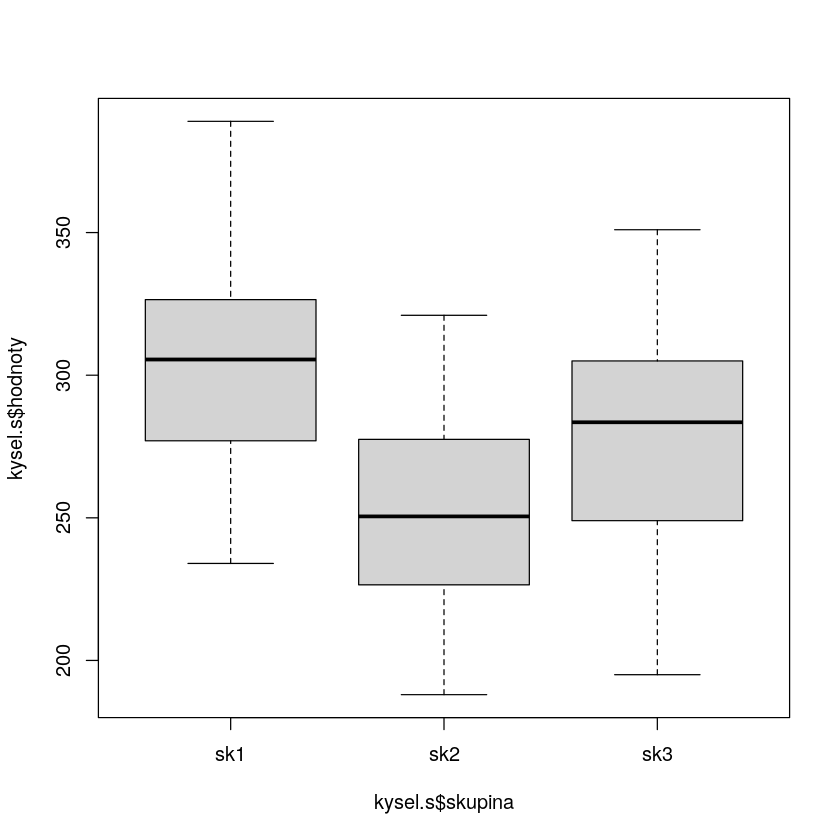

In [24]:
boxplot(kysel.s$hodnoty ~ kysel.s$skupina)
# Data neobsahují odlehlá pozorování.


In [25]:
# otestujeme normalitu pomocí S.-W. testu
library(dplyr)

kysel.s %>%
    group_by(skupina) %>%
    summarise(norm.pval = shapiro.test(hodnoty)$p.value, sym.pval = lawstat::symmetry.test(hodnoty, boot = FALSE)$p.value,
    prumery = mean(hodnoty), smer = sd(hodnoty), med = median(hodnoty)
    
    
    )



skupina,norm.pval,sym.pval,prumery,smer,med
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sk1,0.9767689,0.7202273,304.0750,33.78468,305.5
sk2,0.7705138,0.9207286,250.9250,34.02291,250.5
sk3,0.5249177,0.1507440,277.1667,38.49036,283.5


In [26]:
# Informace potřebné pro nastavení zaokrouhlování

kysel.s %>%
    group_by(skupina) %>%
    summarise(len = length(hodnoty), st.dev = sd(hodnoty))

# sd zaokrouhlujeme na 3 platné cifry
# sd a míry polohy zaokrouhlujeme na desetiny


skupina,len,st.dev
<fct>,<int>,<dbl>
sk1,40,33.78468
sk2,40,34.02291
sk3,42,38.49036


In [27]:
# Ověření shody rozptylů
s2 <- kysel.s %>%
        group_by(skupina) %>%
        summarise(var = sd(hodnoty)^2)
s2 # výběrové rozptyly

max(s2$var) / min(s2$var)
# Dle krabicového grafu a informace o poměru největšího a nejmenšího
# rozptylů (<2) nepředpokládáme, že se rozptyly statisticky významně liší


skupina,var
<fct>,<dbl>
sk1,1141.404
sk2,1157.558
sk3,1481.508


[1] 1.297969

In [28]:
# Předpoklad normality nebyl zamítnut -> Bartlettův test
bartlett.test(kysel.s$hodnoty ~ kysel.s$skupina)

# Na hladině významnosti 0,05 nelze zamítnout předpoklad o shodě rozptylů
# (Bartlettův test, x_OBS = 0,878, df = 2, p-hodnota = 0,645).



	Bartlett test of homogeneity of variances

data:  kysel.s$hodnoty by kysel.s$skupina
Bartlett's K-squared = 0.87826, df = 2, p-value = 0.6446


In [29]:
# Chceme srovnávat stř. hodnoty nezávislých výběrů z normálních rozdělení
# se stejnými rozptyly -> ANOVA
# příkaz aov() vyžaduje data ve standardním datovém formátu

vysledky <- aov(kysel.s$hodnoty ~ kysel.s$skupina)
summary(vysledky)

# Na hladině významnosti 0,05 zamítáme hypotézu o shodě středních hodnot
# (ANOVA, p-hodnota<<0,001) -> mnohonásobné porovnávání


                 Df Sum Sq Mean Sq F value   Pr(>F)    
kysel.s$skupina   2  56502   28251   22.35 5.73e-09 ***
Residuals       119 150401    1264                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [30]:
# post-hoc analýza
TukeyHSD(vysledky)


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = kysel.s$hodnoty ~ kysel.s$skupina)

$`kysel.s$skupina`
             diff        lwr       upr     p adj
sk2-sk1 -53.15000 -72.017226 -34.28277 0.0000000
sk3-sk1 -26.90833 -45.549597  -8.26707 0.0024094
sk3-sk2  26.24167   7.600403  44.88293 0.0031788


In [31]:
# počítání efektů
library(dplyr)

# celkový průměr
prumer_vsech <- mean(kysel.s$hodnoty)
prumer_vsech

# průměry ve skupinách
efekty <- kysel.s %>%
    group_by(skupina) %>%
    summarize(mean_skup = mean(hodnoty))

# efekty
efekty$efekt <- efekty$mean_skup - prumer_vsech

# vypsat setřízené
efekty %>% arrange(desc(efekt))

# Považujeme-li vysoký obsah kyseliny listové za pozitivní, pak statisticky
# významně nejlepších výsledků dosáhli pacienti ze skupiny 1 (průměrný obsah
# kys. listové o cca 27 jednotek vyšší než prům. obsah kys. listové v krvi
# všech testovaných pacientů) a statisticky významně nejhorších výsledků
# dosáhli pacienti ze skup. 2 (průměrný obsah kys. listové o cca 26 jednotek
# nižší než průměrný obsah kys. listové v krvi všech testovaných pacientů).
# Obsah kys. listové v krvi pacientů ze skupiny 3
# odpovídá celkovému průměru. Všechny tři skupiny pacientů jsou navzájem dle
# obsahu kys. listové v krvi statisticky významně odlišné.


[1] 277.3852

skupina,mean_skup,efekt
<fct>,<dbl>,<dbl>
sk1,304.0750,26.6897541
sk3,277.1667,-0.2185792
sk2,250.9250,-26.4602459


## Příklad 3.
Na farmě jsou chována tři plemena králíků. Byl proveden pokus kralici.xls, jehož cílem bylo zjistit, zda i když chováme a vykrmujeme všechny králíky po stejnou dobu a za stejných podmínek, existuje statisticky významný (průkazný) rozdíl mezi plemeny v hmotnostech králíků. Ověřte.

In [32]:
kralici <- readxl::read_excel("data/testy_vicevyberove.xlsx", sheet = 2)
colnames(kralici) <- c("viden", "cesky", "kalif") # přejmenování sloupců
kralici


viden,cesky,kalif
<dbl>,<dbl>,<dbl>
4.125,3.518,4.902
3.923,3.464,5.228
4.046,3.337,4.950
4.247,3.669,5.054
3.869,3.642,5.048
4.094,3.440,4.970
4.080,3.286,5.142
4.156,3.536,5.221
3.948,38.100,4.903


In [33]:
# převod do standardního datového formátu
kralici.s <- stack(kralici)
colnames(kralici.s) <- c("hodnoty", "skupina")
kralici.s <- na.omit(kralici.s)
head(kralici.s)


,hodnoty,skupina
,<dbl>,<fct>
1,4.125,viden
2,3.923,viden
3,4.046,viden
4,4.247,viden
5,3.869,viden
6,4.094,viden


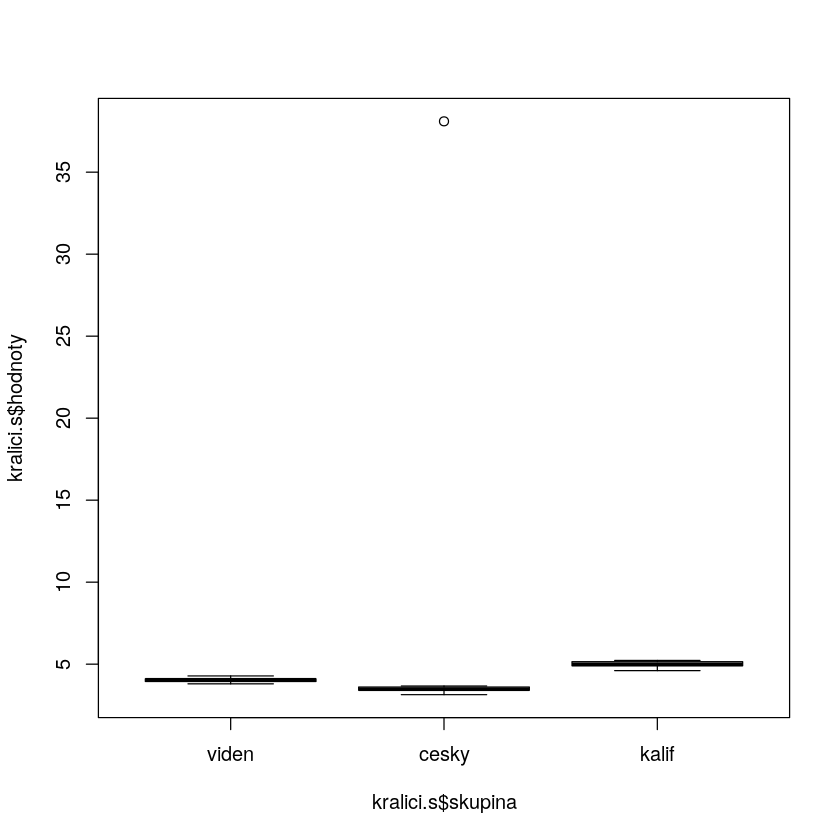

In [34]:
boxplot(kralici.s$hodnoty ~ kralici.s$skupina)
# data obsahojí OP


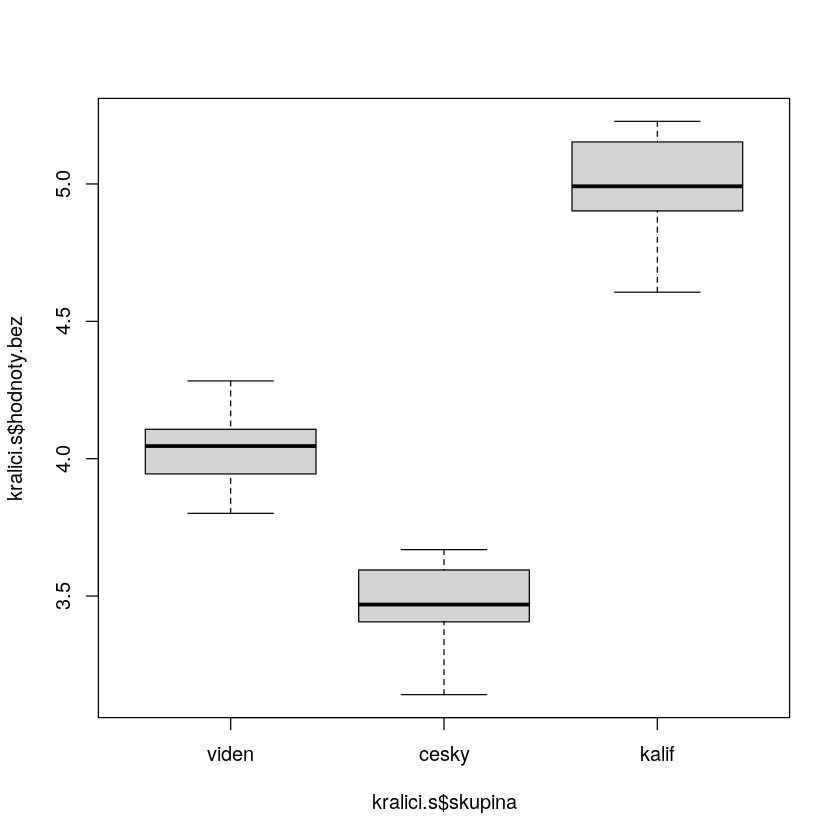

In [36]:
# Odstranění odlehlého pozorování
kralici.s$id <- seq_along(kralici.s$hodnoty)
outliers <- kralici.s %>% group_by(skupina) %>% rstatix::identify_outliers(hodnoty)
kralici.s <- kralici.s %>% mutate(hodnoty.bez = ifelse(id %in% outliers$id, NaN, hodnoty))

boxplot(kralici.s$hodnoty.bez ~ kralici.s$skupina)

skupina,hodnoty,id,is.outlier,is.extreme
<fct>,<dbl>,<int>,<lgl>,<lgl>
cesky,38.1,32,TRUE,TRUE


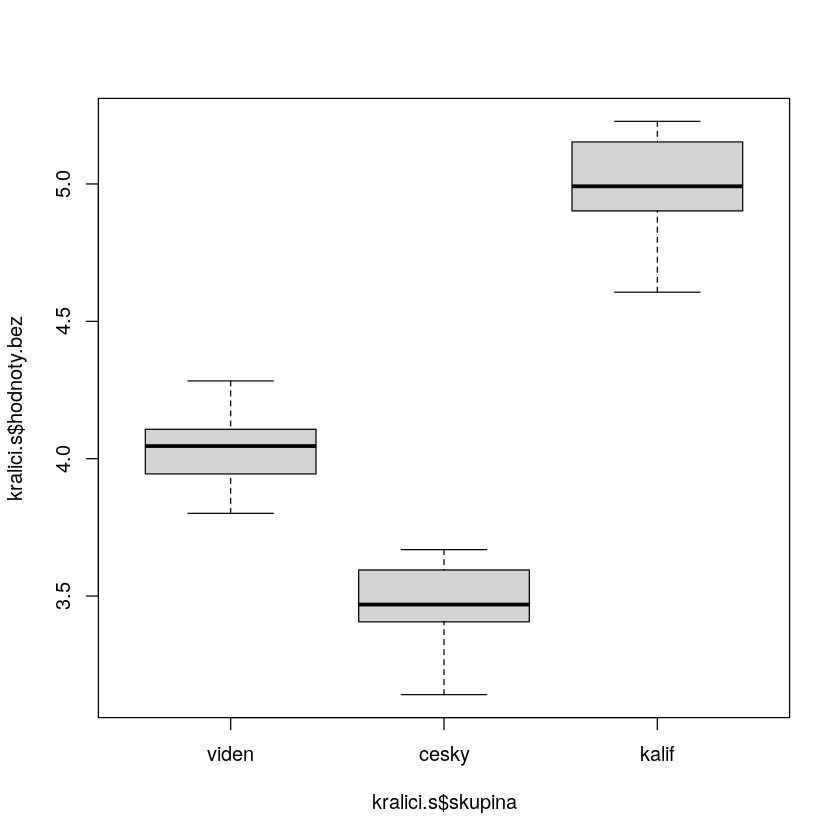

In [34]:
# Odstranění odlehlého pozorování
kralici.s$id <- seq_along(kralici.s$hodnoty)

outliers <- kralici.s %>%
    group_by(skupina) %>%
    rstatix::identify_outliers(hodnoty)
outliers
kralici.s$hodnoty.bez <- ifelse(kralici.s$id %in% outliers$id, NaN, kralici.s$hodnoty)
boxplot(kralici.s$hodnoty.bez ~ kralici.s$skupina)

skupina,hodnoty,id,is.outlier,is.extreme
<fct>,<dbl>,<int>,<lgl>,<lgl>
cesky,38.1,32,TRUE,TRUE


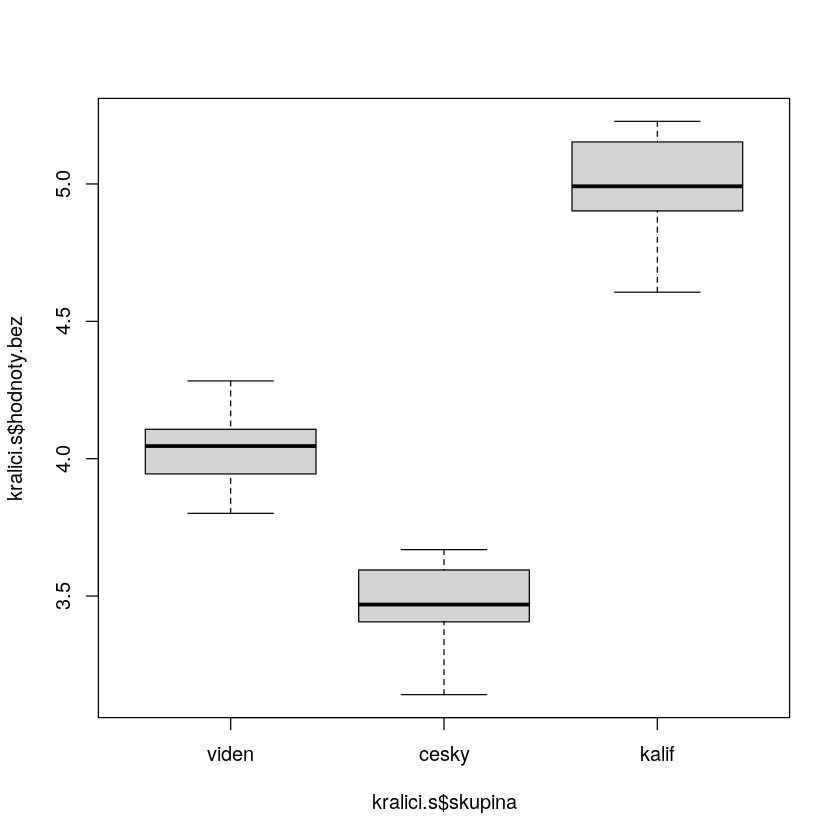

In [ ]:
dataset$id <- seq_along(dataset$hodnoty)
outliers <- dataset %>% group_by(skupina) %>% rstatix::identify_outliers(hodnoty)
dataset <- dataset %>% mutate(hodnoty.bez = ifelse(id %in% outliers$id, NaN, hodnoty))
boxplot(dataset$hodnoty.bez ~ dataset$skupina)

In [36]:
library(dplyr)

kralici.s %>%
    group_by(skupina) %>%
    summarise(norm.pval = shapiro.test(hodnoty.bez)$p.value)

# Na hladině významnosti 0,05 nezamítáme předpoklad normality.


skupina,norm.pval
<fct>,<dbl>
viden,0.8247350
cesky,0.2775194
kalif,0.1685629


In [35]:
# Informace potřebné pro nastavení zaokrouhlování
kralici.s %>%
    group_by(skupina) %>%
    summarize(
        len = sum(!is.nan(hodnoty.bez)),
        sd = sd(hodnoty.bez, na.rm = TRUE)
    )

# sd zaokrouhlujeme na 2 platné cifry
# sd a míry polohy zaok. na setiny (sjednocení napříč druhy králíků)


skupina,len,sd
<fct>,<int>,<dbl>
viden,23,0.1270971
cesky,22,0.1393983
kalif,18,0.1859894


In [ ]:
# Ověření shody rozptylů
s2 <- kralici.s %>%
        group_by(skupina) %>%
        summarize(var = sd(hodnoty.bez, na.rm = TRUE)^2)
s2

max(s2$var) / min(s2$var)
# Dle krabicového grafu a informace o poměru největšího a nejmenšího rozpt.
# (blízký 2, avšak rozsah výběrů < 30) je těžší odhadnout, zda lze
# předpokládat shodu rozptylů. Rozhodnout nám pomůže test.


In [37]:
# Předpoklad normality nebyl zamítnut -> Bartlettův test
bartlett.test(kralici.s$hodnoty.bez ~ kralici.s$skupina)

# Na hladině významnosti 0,05 nelze zamítnout předpoklad o shodě rozptylů
# (Bartlettův test, x_OBS = 3,1, df = 2, p-hodnota = 0,217).



	Bartlett test of homogeneity of variances

data:  kralici.s$hodnoty.bez by kralici.s$skupina
Bartlett's K-squared = 3.0553, df = 2, p-value = 0.217


In [38]:
# Chceme srovnávat stř. hodnoty nezávislých výběrů z normálních
# rozdělení se stejnými rozptyly -> ANOVA
# příkaz aov() vyžaduje data ve standardním datovém formátu

vysledky <- aov(kralici.s$hodnoty.bez ~ kralici.s$skupina)
summary(vysledky)

# Na hladině významnosti 0,05 zamítáme hypotézu o shodě středních hodnot
# (p-hodnota<<0,001, ANOVA) -> mnohonásobné porovnávání


                  Df Sum Sq Mean Sq F value Pr(>F)    
kralici.s$skupina  2 22.943  11.472   509.3 <2e-16 ***
Residuals         60  1.352   0.023                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1 observation deleted due to missingness

In [40]:
# post-hoc analýza
TukeyHSD(vysledky)


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = kralici.s$hodnoty.bez ~ kralici.s$skupina)

$`kralici.s$skupina`
                  diff        lwr        upr p adj
cesky-viden -0.5613577 -0.6689197 -0.4537957     0
kalif-viden  0.9539251  0.8404189  1.0674313     0
kalif-cesky  1.5152828  1.4006497  1.6299160     0


In [39]:
# počítání efektů
library(dplyr)

# celkový průměr
prumer_vsech <- mean(kralici.s$hodnoty.bez, na.rm = TRUE)
prumer_vsech

# průměry ve skupinách
efekty <- kralici.s %>%
    group_by(skupina) %>%
    summarize(mean_skup = mean(hodnoty.bez, na.rm = TRUE))

# efekty
efekty$efekt <- efekty$mean_skup - prumer_vsech

# vypsat setřízené
efekty %>% arrange(desc(efekt))


[1] 4.114651

skupina,mean_skup,efekt
<fct>,<dbl>,<dbl>
kalif,4.992056,0.87740476
viden,4.038130,-0.07652036
cesky,3.476773,-0.63787807


## Příklad 4.
Soutěž o nejlepší jakost výrobků obeslali čtyři výrobci A, B, C, D celkem 66 výrobky. Porota sestavila pořadí (uvedeno pouze pořadí výrobku od nejlepšího k nejhoršímu), jež je uvedené v souboru jakost.xls. Na základě uvedených údajů posuďte, zda původ výrobků má vliv na jeho jakost.

In [41]:
jakost.s <- readxl::read_excel("data/testy_vicevyberove.xlsx", sheet = 3)
colnames(jakost.s) <- c("poradi", "skupina") # přejmenování sloupců
head(jakost.s)
# data již jsou v standardním formátu


poradi,skupina
<dbl>,<chr>
1,B
2,D
3,B
4,B
5,C
6,B


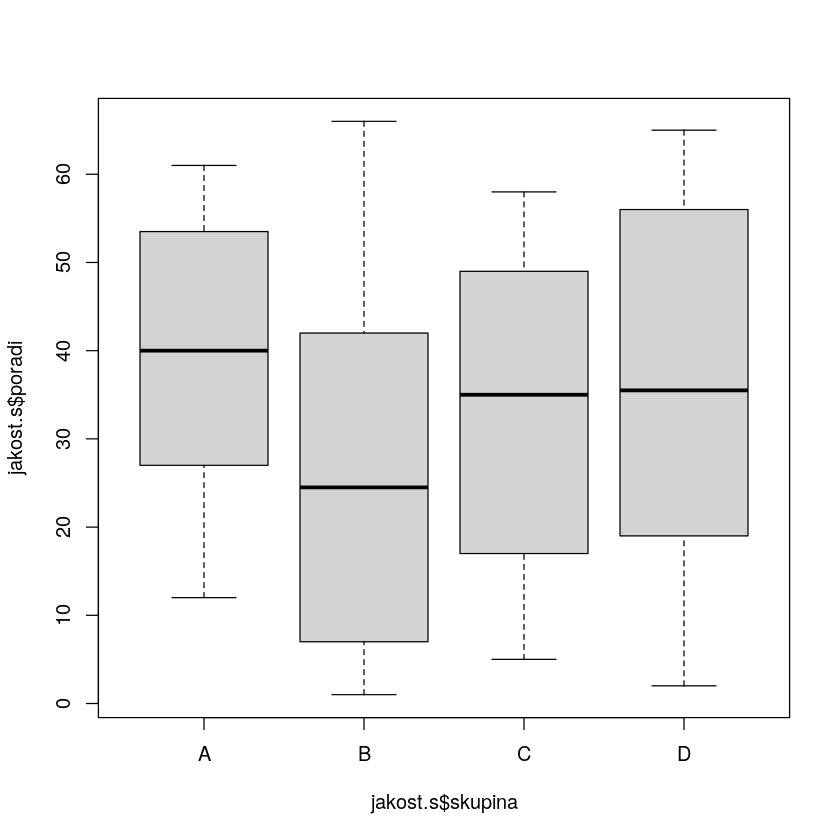

In [42]:
boxplot(jakost.s$poradi ~ jakost.s$skupina)

# Ověření normality nemá smysl provádět - z povahy jde o diskr. data-pořadí


In [ ]:
# Informace potřebné pro nastavení zaokrouhlování
jakost.s %>%
    group_by(skupina) %>%
    summarize(
        len = length(poradi),
        sd = sd(poradi)
    )

# sd zaokrouhlujeme na 2 platné cifry
# sd a míry polohy zaokrouhlujeme na celá čísla


In [ ]:
# Ověření shody rozptylů
s2 <- jakost.s %>%
    group_by(skupina) %>%
    summarize(var = sd(poradi)^2)
s2

max(s2$var) / min(s2$var)
# Dle krabicového grafu a informace o poměru největšího a nejmenšího
# rozptylů (<2) ze předpokládat shodu rozptylů.
# (Kruskalův - Wallisův test má větší sílu testu, jsou-li data homosk.)


In [ ]:
# Jde o "pořadová" data, nemá smysl uvažovat o předpokladu norm.
# -> Leveneův test
car::leveneTest(jakost.s$poradi ~ jakost.s$skupina)
# Na hladině významnosti 0,05 nelze zamítnout předpoklad o shodě rozptylů
# (Leveneho test, x_OBS = 0,4, df_num = 3, df_denom = 62, p-hodnota = 0,750)


In [ ]:
# Ověření symetrie

jakost.s %>%
    group_by(skupina) %>%
    summarize(
        sikmost = moments::skewness(poradi),
        test.pval = lawstat::symmetry.test(poradi, boot = FALSE)$p.value
    )


In [43]:
# Chceme srovnávat mediány nezávislých výběrů -> Kruskalův-Wallisův test
kruskal.test(jakost.s$poradi ~ jakost.s$skupina)

# Na hladině významnosti 0,05 nelze zamítnout hypotézu o shodě mediánů
# (Kruskalův-Wallisův test, x_OBS = 3,7, df = 3, p-hodnota=0,295).
# Tj. statisticky významné rozdíly mezi výrobci (z hlediska pořadí
# výrobků v soutěži) neexistují.



	Kruskal-Wallis rank sum test

data:  jakost.s$poradi by jakost.s$skupina
Kruskal-Wallis chi-squared = 3.7032, df = 3, p-value = 0.2953


## Příklad 5.
Byl sledován vliv tří preparátů na srážlivost krve. Kromě jiných ukazatelů byl zjišťován tzv. trombinový čas. Údaje o 42 sledovaných osobách jsou zaznamenány v souboru trombin.xls. Závisí velikost trombinového času na tom, jaký byl použit preparát?

In [44]:
trombin.s <- readxl::read_excel("data/testy_vicevyberove.xlsx",
    sheet = 4, skip = 1
)
colnames(trombin.s) <- c("hodnoty", "skupina") # přejmenování sloupců

head(trombin.s)
# data jsou již ve standardním formátu


hodnoty,skupina
<dbl>,<chr>
12,A
10,A
10,A
12,A
10,A
12,A


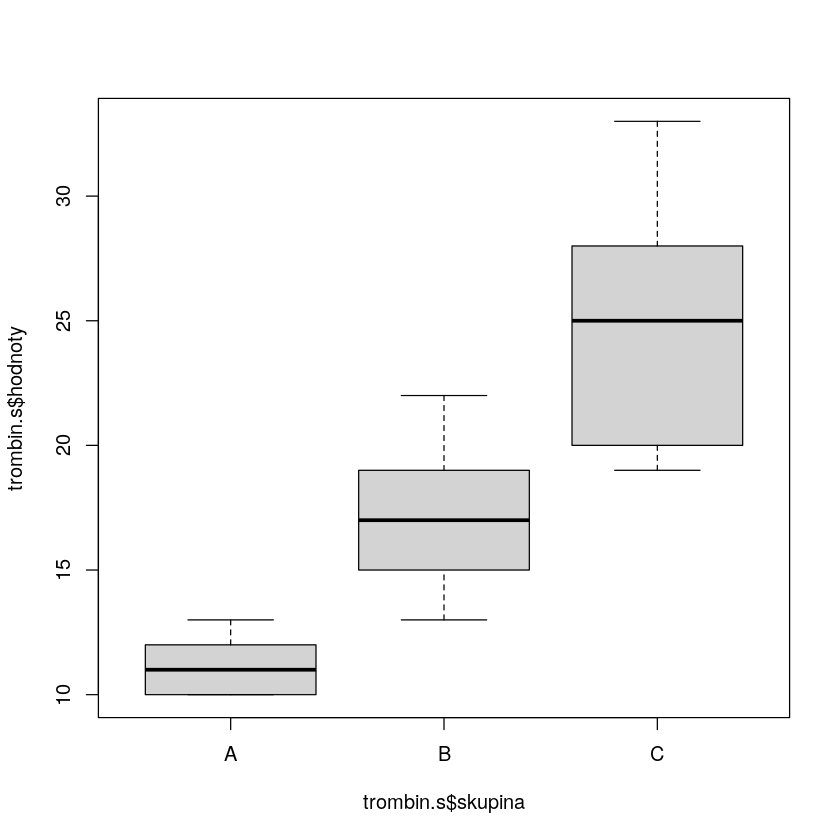

In [45]:
# explorační analýza - ověření OP
boxplot(trombin.s$hodnoty ~ trombin.s$skupina)
# neobsahuje OP


In [48]:
# ověření normality
library(dplyr)

trombin.s %>%
    group_by(skupina) %>%
    summarize(norm.pval = shapiro.test(hodnoty)$p.value, sym.pval = lawstat::symmetry.test(hodnoty,boot = FALSE)$p.value)

# Na hladině významnosti 0,05 zamítáme předpoklad normality (u Ačka)


skupina,norm.pval,sym.pval
<chr>,<dbl>,<dbl>
A,0.03179805,1.0000000
B,0.94597139,0.7777511
C,0.27138568,0.8792017


In [52]:
# Informace potřebné pro nastavení zaokrouhlování

trombin.s %>%
    group_by(skupina) %>%
    summarize(len = length(hodnoty), stdev = sd(hodnoty))

# sd zaokrouhlujeme na 2 platné cifry
# sd a míry polohy zaokrouhlujeme na setiny (sjednocení napříč skupinami)


skupina,len,stdev
<chr>,<int>,<dbl>
A,14,0.9607689
B,14,2.5677630
C,14,4.7207748


In [ ]:
# Ověření shody rozptylů (není nutné - stejně musíme použít KW)
s2 <- trombin.s %>%
        group_by(skupina) %>%
        summarize(var = sd(hodnoty)^2)
s2

max(s2$var) / min(s2$var)
# Dle krabicového grafu a informace o poměru největšího a nejmenšího
# rozptylů (>>2) nelze předpokládat shodu rozptylů.


In [ ]:
# Předpoklad normality byl zamítnut -> Leveneho test

# trombin.s$skupina = as.factor(trombin.s$skupina)

car::leveneTest(trombin.s$hodnoty ~ trombin.s$skupina)

# předpoklad homoskedasticity byl zamítnut


In [ ]:
# Ověření symetrie
trombin.s %>%
  group_by(skupina) %>%
  summarize(
    sikmost = moments::skewness(hodnoty),
    test.pval = lawstat::symmetry.test(hodnoty, boot = FALSE)$p.value
  )
# nezamítáme přepoklad symetrie dat


In [49]:
# Chceme srovnávat mediány nez. výběrů, která nemají norm. rozdělení
# -> Kruskalův - Wallisův test

kruskal.test(trombin.s$hodnoty, trombin.s$skupina)
# Na hladině významnosti 0,05 zamítáme hypotézu o shodě mediánů
# Tj. trombinový čas je statisticky významně
# ovlivněn preparátem. -> mnohonásobné porovnávání



	Kruskal-Wallis rank sum test

data:  trombin.s$hodnoty and trombin.s$skupina
Kruskal-Wallis chi-squared = 34.535, df = 2, p-value = 3.169e-08


In [50]:
# altP = T nastavuje p-hodnotu tak,aby se při rozhodování
# o statistické významnosti srovnávala s alfa
# (defaultně: altp = FALSE, pak srovnáváme s alfa/2)

dunn.test::dunn.test(trombin.s$hodnoty, trombin.s$skupina,
    method = "bonferroni", altp = TRUE
)


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 34.5348, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          A          B
---------+----------------------
       B |  -3.189477
         |    0.0043*
         |
       C |  -5.869256  -2.679778
         |    0.0000*    0.0221*

alpha = 0.05
Reject Ho if p <= alpha


In [51]:
# počítání efektů
library(dplyr)

# celkový průměr
median_vsech <- median(trombin.s$hodnoty)
median_vsech

# průměry ve skupinách
efekty <- trombin.s %>%
    group_by(skupina) %>%
    summarize(median_skup = median(hodnoty))

# efekty
efekty$efekt <- efekty$median_skup - median_vsech

# vypsat setřízené
efekty %>% arrange(desc(efekt))


[1] 17

skupina,median_skup,efekt
<chr>,<dbl>,<dbl>
C,25,8
B,17,0
A,11,-6


## Příklad 6. (více skupin)
Co se Sněhurka dostala k sedmi trpaslíkům vycítila příležitost nemalého výdělku. Trpaslíci Sněhurce v podstatě zobou z ruky a veškeré vydolované zlato jí ihned předávají. Sněhurce však ani toto úplně nestačí a má pocit, že by mohla z trpaslíků benefitovat více. Proto si začla zaznamenávat kolik kilogramů zlata denně od každého z trpaslíků obdrží (snehurka.xlsx). Ověřte, zda se trpaslíci liší v množství vytěženého zlata, pokud ano sestave homogenní skupiny z hlediska vytěženého zlata.

In [53]:
zlato <- readxl::read_excel("data/snehurka.xlsx")
head(zlato)
# data jsou ve standardním dtovém formátu


hodnota,typ
<dbl>,<chr>
0.8892697,Profa
1.5882393,Profa
2.0176732,Profa
1.2511435,Profa
2.1443305,Profa
1.2500689,Profa


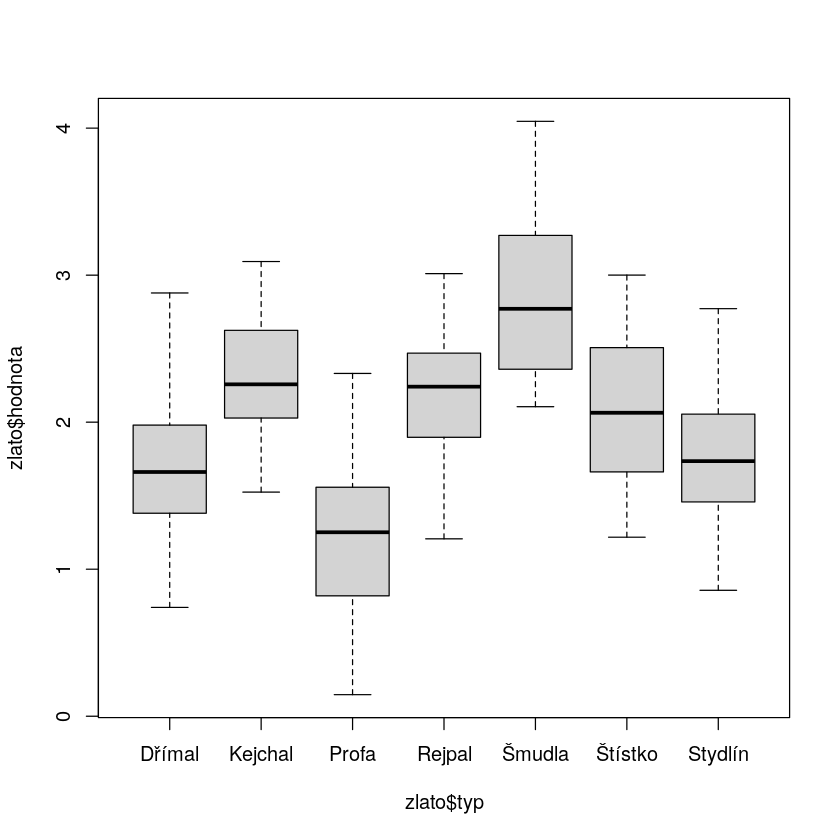

In [54]:
boxplot(zlato$hodnota ~ zlato$typ)
# data neobsahují OP


In [55]:
# ověření normality
library(dplyr)

zlato %>%
    group_by(typ) %>%
    summarize(p.hodnota = shapiro.test(hodnota)$p.value)

# Na hladině významnosti 0,05 ne zamítáme předpoklad normality


typ,p.hodnota
<chr>,<dbl>
Dřímal,0.8295308
Kejchal,0.8162545
Profa,0.8265843
Rejpal,0.6555333
Stydlín,0.9177484
Šmudla,0.1177217
Štístko,0.1866139


In [56]:
# Předpoklad normality nebyl zamítnut -> Bartlettův test
bartlett.test(zlato$hodnota ~ zlato$typ)

# Na hladině významnosti 0,05 nelze zamítnout předpoklad o shodě rozptylů



	Bartlett test of homogeneity of variances

data:  zlato$hodnota by zlato$typ
Bartlett's K-squared = 5.1736, df = 6, p-value = 0.5217


In [57]:
# ANOVA
vysledky <- aov(zlato$hodnota ~ zlato$typ)
summary(vysledky)
# Zamítáme předpoklad o shodě
# -> existují stat. významné rozdíly ve středních hodnotách


             Df Sum Sq Mean Sq F value Pr(>F)    
zlato$typ     6  50.71   8.451   35.87 <2e-16 ***
Residuals   210  49.47   0.236                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [58]:
# POST-HOC
res <- TukeyHSD(vysledky)[[1]]
res


,diff,lwr,upr,p adj
Kejchal-Dřímal,0.61338486,0.24635938,0.98041034,2.769364e-05
Profa-Dřímal,-0.45472230,-0.82174778,-0.08769682,5.265389e-03
Rejpal-Dřímal,0.54761573,0.18059025,0.91464121,2.871456e-04
Šmudla-Dřímal,1.18016854,0.81314306,1.54719402,2.609024e-14
Štístko-Dřímal,0.42198262,0.05495714,0.78900810,1.296949e-02
Stydlín-Dřímal,0.09891331,-0.26811217,0.46593879,9.845413e-01
Profa-Kejchal,-1.06810716,-1.43513263,-0.70108168,5.551115e-14
Rejpal-Kejchal,-0.06576913,-0.43279460,0.30125635,9.983200e-01
Šmudla-Kejchal,0.56678368,0.19975820,0.93380916,1.485215e-04
Štístko-Kejchal,-0.19140224,-0.55842772,0.17562324,7.125148e-01


In [59]:
# počítání efektů
library(dplyr)

# celkový průměr
prumer_vsech <- mean(zlato$hodnota)
prumer_vsech

# průměry ve skupinách
efekty <- zlato %>%
    group_by(typ) %>%
    summarize(mean_skup = mean(hodnota))

# efekty
efekty$efekt <- efekty$mean_skup - prumer_vsech

# vypsat setřízené
efekty.s <- efekty %>% arrange(desc(efekt))
efekty.s


[1] 2.013667

typ,mean_skup,efekt
<chr>,<dbl>,<dbl>
Šmudla,2.849930,0.83626243
Kejchal,2.283146,0.26947875
Rejpal,2.217377,0.20370962
Štístko,2.091744,0.07807651
Stydlín,1.768674,-0.24499280
Dřímal,1.669761,-0.34390611
Profa,1.215039,-0.79862841


In [1]:
install.packages("dunn.test")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

